# Geopandas

[Geopandas](https://geopandas.org/en/stable/index.html) is an open source project to make working with geospatial data in python easier. 

GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. 

Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.

LLM applications (chat, QA) that utilize geospatial data are an interesting area for exploration.

In [ ]:
! pip install sodapy
! pip install pandas
! pip install geopandas

In [2]:
import ast
import pandas as pd
import geopandas as gpd
from langchain.document_loaders import OpenCityDataLoader

Create a GeoPandas dataframe from [`Open City Data`](https://python.langchain.com/docs/integrations/document_loaders/open_city_data) as an example input.

In [ ]:
# Load Open City Data
dataset = "tmnf-yvry"  # San Francisco crime data
loader = OpenCityDataLoader(city_id="data.sfgov.org", dataset_id=dataset, limit=5000)
docs = loader.load()

In [30]:
# Convert list of dictionaries to DataFrame
df = pd.DataFrame([ast.literal_eval(d.page_content) for d in docs])

# Extract latitude and longitude
df["Latitude"] = df["location"].apply(lambda loc: loc["coordinates"][1])
df["Longitude"] = df["location"].apply(lambda loc: loc["coordinates"][0])

# Create geopandas DF
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

# Only keep valid longitudes and latitudes for San Francisco
gdf = gdf[
    (gdf["Longitude"] >= -123.173825)
    & (gdf["Longitude"] <= -122.281780)
    & (gdf["Latitude"] >= 37.623983)
    & (gdf["Latitude"] <= 37.929824)
]

Visiualization of the sample of SF crimne data. 

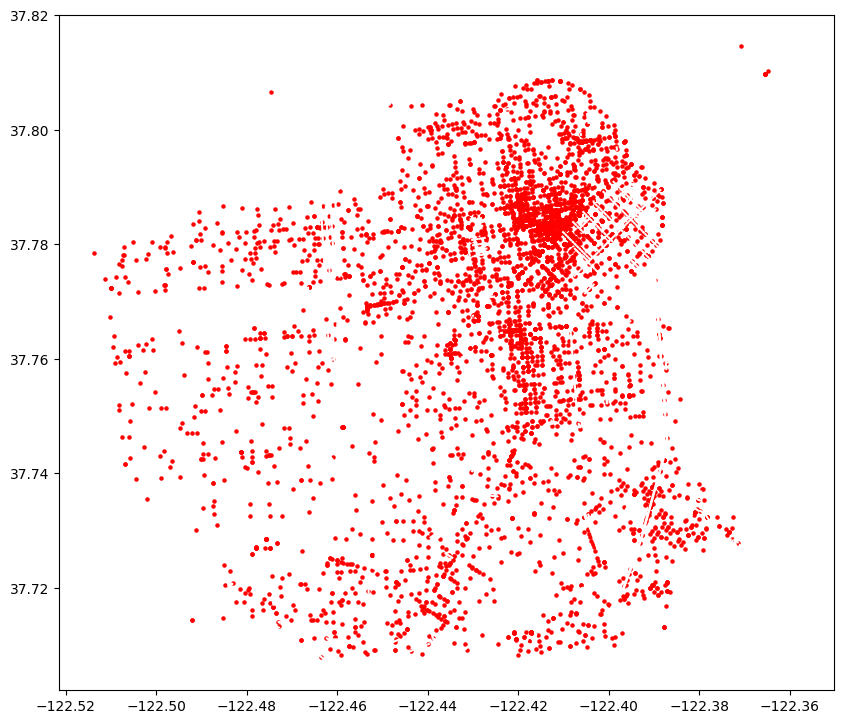

In [31]:
import matplotlib.pyplot as plt

# Load San Francisco map data
sf = gpd.read_file("https://data.sfgov.org/resource/3psu-pn9h.geojson")

# Plot the San Francisco map and the points
fig, ax = plt.subplots(figsize=(10, 10))
sf.plot(ax=ax, color="white", edgecolor="black")
gdf.plot(ax=ax, color="red", markersize=5)
plt.show()

Load GeoPandas dataframe as a `Document` for downstream processing (embedding, chat, etc). 

The `geometry` will be the default `page_content` columns, and all other columns are placed in `metadata`.

But, we can specify the `page_content_column`.

In [32]:
from langchain.document_loaders import GeoDataFrameLoader

loader = GeoDataFrameLoader(data_frame=gdf, page_content_column="geometry")
docs = loader.load()

In [33]:
docs[0]

Document(page_content='POINT (-122.420084075249 37.7083109744362)', metadata={'pdid': '4133422003074', 'incidntnum': '041334220', 'incident_code': '03074', 'category': 'ROBBERY', 'descript': 'ROBBERY, BODILY FORCE', 'dayofweek': 'Monday', 'date': '2004-11-22T00:00:00.000', 'time': '17:50', 'pddistrict': 'INGLESIDE', 'resolution': 'NONE', 'address': 'GENEVA AV / SANTOS ST', 'x': '-122.420084075249', 'y': '37.7083109744362', 'location': {'type': 'Point', 'coordinates': [-122.420084075249, 37.7083109744362]}, ':@computed_region_26cr_cadq': '9', ':@computed_region_rxqg_mtj9': '8', ':@computed_region_bh8s_q3mv': '309', ':@computed_region_6qbp_sg9q': nan, ':@computed_region_qgnn_b9vv': nan, ':@computed_region_ajp5_b2md': nan, ':@computed_region_yftq_j783': nan, ':@computed_region_p5aj_wyqh': nan, ':@computed_region_fyvs_ahh9': nan, ':@computed_region_6pnf_4xz7': nan, ':@computed_region_jwn9_ihcz': nan, ':@computed_region_9dfj_4gjx': nan, ':@computed_region_4isq_27mq': nan, ':@computed_region